In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn category-encoders

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


In [5]:
df = pd.read_csv("Crop_recommendation.csv")
print(df.shape)
print(df.info())
print(df.head())


(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

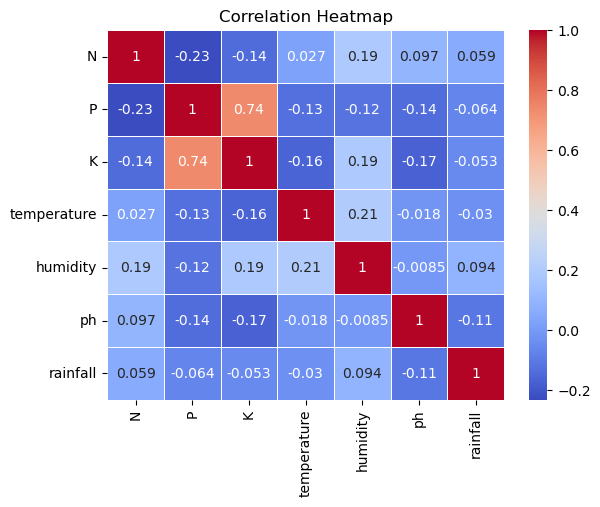

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


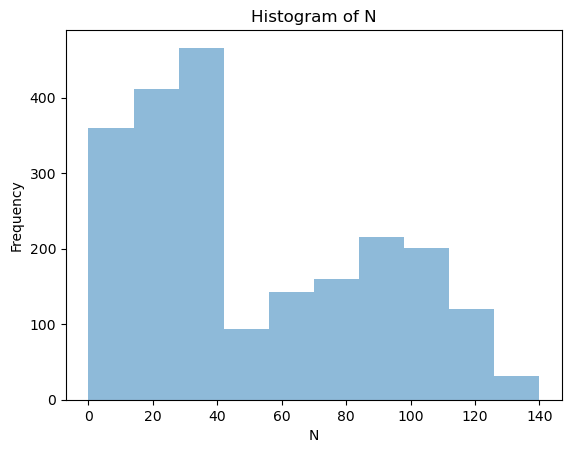

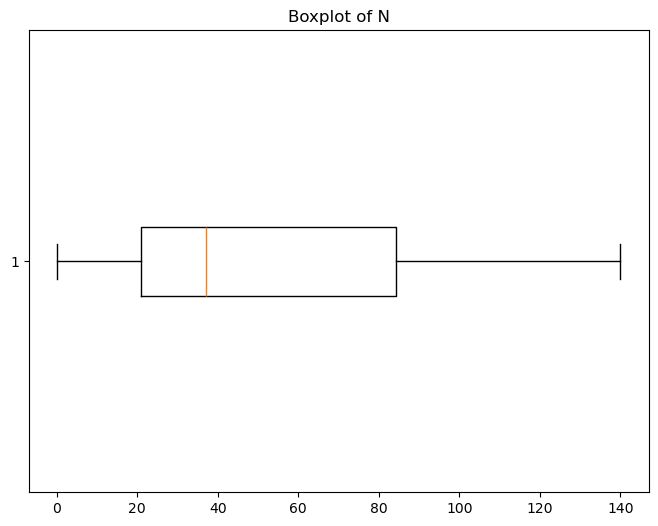

In [9]:
# Histogram for N
plt.hist(df['N'], bins=10, alpha=0.5)
plt.xlabel('N')
plt.ylabel('Frequency')
plt.title('Histogram of N')
plt.show()

# Boxplot for N
plt.figure(figsize=(8, 6))
plt.boxplot(df['N'], vert=False)
plt.title('Boxplot of N')
plt.show()


In [11]:
low_P, high_P = df["P"].quantile([0.01, 0.75])
mask_P = df["P"].between(low_P, high_P)

low_K, high_K = df["K"].quantile([0.01, 0.9])
mask_K = df["K"].between(low_K, high_K)

# Similarly, for ph, temperature, and others
combined_mask = mask_P & mask_K
df_filtered = df[combined_mask]
print(df_filtered.shape)


(1613, 8)


In [13]:
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Training and validation accuracy
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 1.0
Test Accuracy: 0.98


In [15]:
# Build Random Forest Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Accuracy for Random Forest
acc_train_rf = accuracy_score(y_train, model_rf.predict(X_train))
acc_test_rf = model_rf.score(X_test, y_test)

print("Random Forest - Training Accuracy:", round(acc_train_rf, 2))
print("Random Forest - Test Accuracy:", round(acc_test_rf, 2))


Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.99


In [17]:
# Predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Precision, Recall, F1 score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Test Precision:", round(precision_test, 2))
print("Test Recall:", round(recall_test, 2))
print("Test F1 Score:", round(f1_test, 2))


Test Precision: 0.98
Test Recall: 0.98
Test F1 Score: 0.98


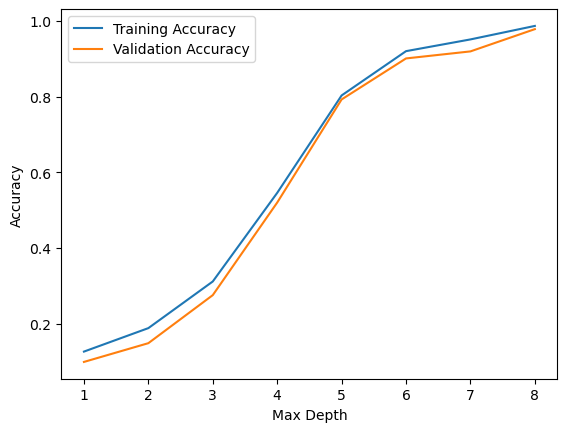

In [19]:
depth_hyperparams = range(1, 9)
training_acc = []
validation_acc = []

# Training with different depths
for depth in depth_hyperparams:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    training_acc.append(model.score(X_train, y_train))
    validation_acc.append(model.score(X_test, y_test))

plt.plot(depth_hyperparams, training_acc, label='Training Accuracy')
plt.plot(depth_hyperparams, validation_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
!pip install joblib

In [25]:
import joblib

# Save the model to a file
joblib.dump(model, 'randomforest_model.pkl')


['randomforest_model.pkl']

In [27]:
import numpy as np
import joblib

# Load the saved model
loaded_model = joblib.load('randomforest_model.pkl')

# Prepare the data (replace these values with your input)
data_to_predict = [90, 42, 43, 20.87974371, 82.00274423, 6.502985292000001, 202.9355362]

# Convert the data to a 2D array (1 row, number of features columns)
data_to_predict = np.array(data_to_predict).reshape(1, -1)

# Make predictions
predictions = loaded_model.predict(data_to_predict)

# Print the predictions
print("Predicted value:", predictions[0])


Predicted value: rice


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
!pip freeze > requirements.txt